In [3]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt


In [82]:

N=130       # Numero de cidades

rng = np.random.default_rng(seed=42)   # Define as posições aleatórias das cidades
x=rng.random(N)
y=rng.random(N)

# define o caminho que liga as cidades (inicialmente a sequencia como foi criada)
pathini = np.zeros(N,dtype=np.int16)
for i in range(N):
    pathini[i]=i

In [83]:
#define a distancia entre duas cidades quaisquer
# @jit(nopython=True)
def distances(N,x,y):
    
    dist = np.zeros((N,N),dtype=np.float32)
    for i in range(N):
        for j in range(N):
            dist[i,j] = np.sqrt((x[i]-x[j])*(x[i]-x[j])+(y[i]-y[j])*(y[i]-y[j]))
            
    return dist

In [84]:
# @jit(nopython=True)
def custo(N,path,dist):
    # calcula a distancia total percorrida pela caminhada
    ener = 0
    for i in range(N-1):
        ener += dist[path[i],path[i+1]]
    ener += dist[path[0],path[N-1]]     # conecta a última e a primeira cidades do caminho
    
    return ener

In [85]:
# @jit(nopython=True)
def newpath(N,path):
    
    # define uma nova caminhada
    
    newpath = np.zeros(N,dtype=np.int16)

    i=np.random.randint(N)   # escolhe uma posição aleatória da caminhada
    j=i
    while j==i:
        j=np.random.randint(N)  # escolhe outra posição 
    if i>j:                    # ordena os índices
        ini = j
        fin = i
    else:
        ini = i
        fin = j

    for k in range(N):        # inverte o sentido em que percorre o caminho entre os indices escolhidos
        if k >= ini and k <= fin:
            newpath[k] = path[fin-k+ini]
        else:
            newpath[k] = path[k]

    return newpath,ini,fin

In [86]:
n_cidades = [10, 50, 100, 150]
d_temp = [0.8, 0.85, 0.9, 0.99]
temp_start = [1, 5, 10]
temp_end = [0.0001, 0.001, 0.005]

In [87]:
class Pos:
    def __init__(self, id):
        self.id = id
        self.x = rng.random()
        self.y = rng.random()
        
    def dist(self, other):
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
      
    def __repr__(self):
      return f"city#{self.id} - pos({self.x},{self.y})"
    
def GenerateCities(n_cities):
  return np.array([Pos(i) for i in range(n_cities)])

def GenerateDistanceMatrix(cities):
  N = len(cities)
  dist = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      dist[i][j] = cities[i].dist(cities[j])
  return dist


## Parameters to be used

In [303]:
n_cities = [10, 50, 100, 150]
temp_start = [1, 5, 10]
temp_end = [0.0001, 0.001, 0.005]
d_temp = [0.8, 0.9, 0.99]

In [334]:
cities = GenerateCities(n_cities[-1]) # already generate all cities instances

### TSP with Simulated Annealing and Monte-Carlo

In [502]:
def run(cities, d_temp, temp_start, temp_end):

  # amount of cities
  n_cities = len(cities)
  
  # gerate distance between cities (matrix NxN)
  distances = GenerateDistanceMatrix(cities)
      
  # generate initial path
  path =  [i for i in range(n_cities)]
  list_of_paths = []
  
  # initial cost
  cost = custo(n_cities, path, distances)
  list_of_costs = []
  # initial temp
  temp = temp_start
  temps = []
  
  # temperature drop
  counter = 0
  
  while (temp > temp_end):
    new_path,st,en = newpath(n_cities, path)
    new_cost = custo(n_cities, new_path, distances)
    
    if new_cost <= cost:
      path = new_path
      cost = new_cost
      
    else:
      threshold = np.exp((-1)*(new_cost - cost) / temp)
      random = rng.random()
      if random < threshold:
        path = new_path
        cost = new_cost
      
    
    
    list_of_costs.append((cost))

    
    counter += 1
    if counter % 100 == 0:
      list_of_paths.append((path, counter, cost, temp))
      temps.append((temp, counter))
      temp *= d_temp
      
  
  return path, temps, list_of_costs, list_of_paths

### 10 cidades

In [ ]:
# 10 cities
paths = []
tempss = []
lists_of_costs = []
for i in temp_start:
  for j in temp_end:
    for k in d_temp:
      # print(f"cities:\t{10}\ndelta_temp:\t{k}\ntemp_start:\t{i}\ntemp_end:\t{j}")
      path, temps, list_of_costs = run(cities[:10], k, i, j)
      paths.append(path)
      tempss.append(temps)
      lists_of_costs.append(list_of_costs)

#### Variação em hiperparâmetros

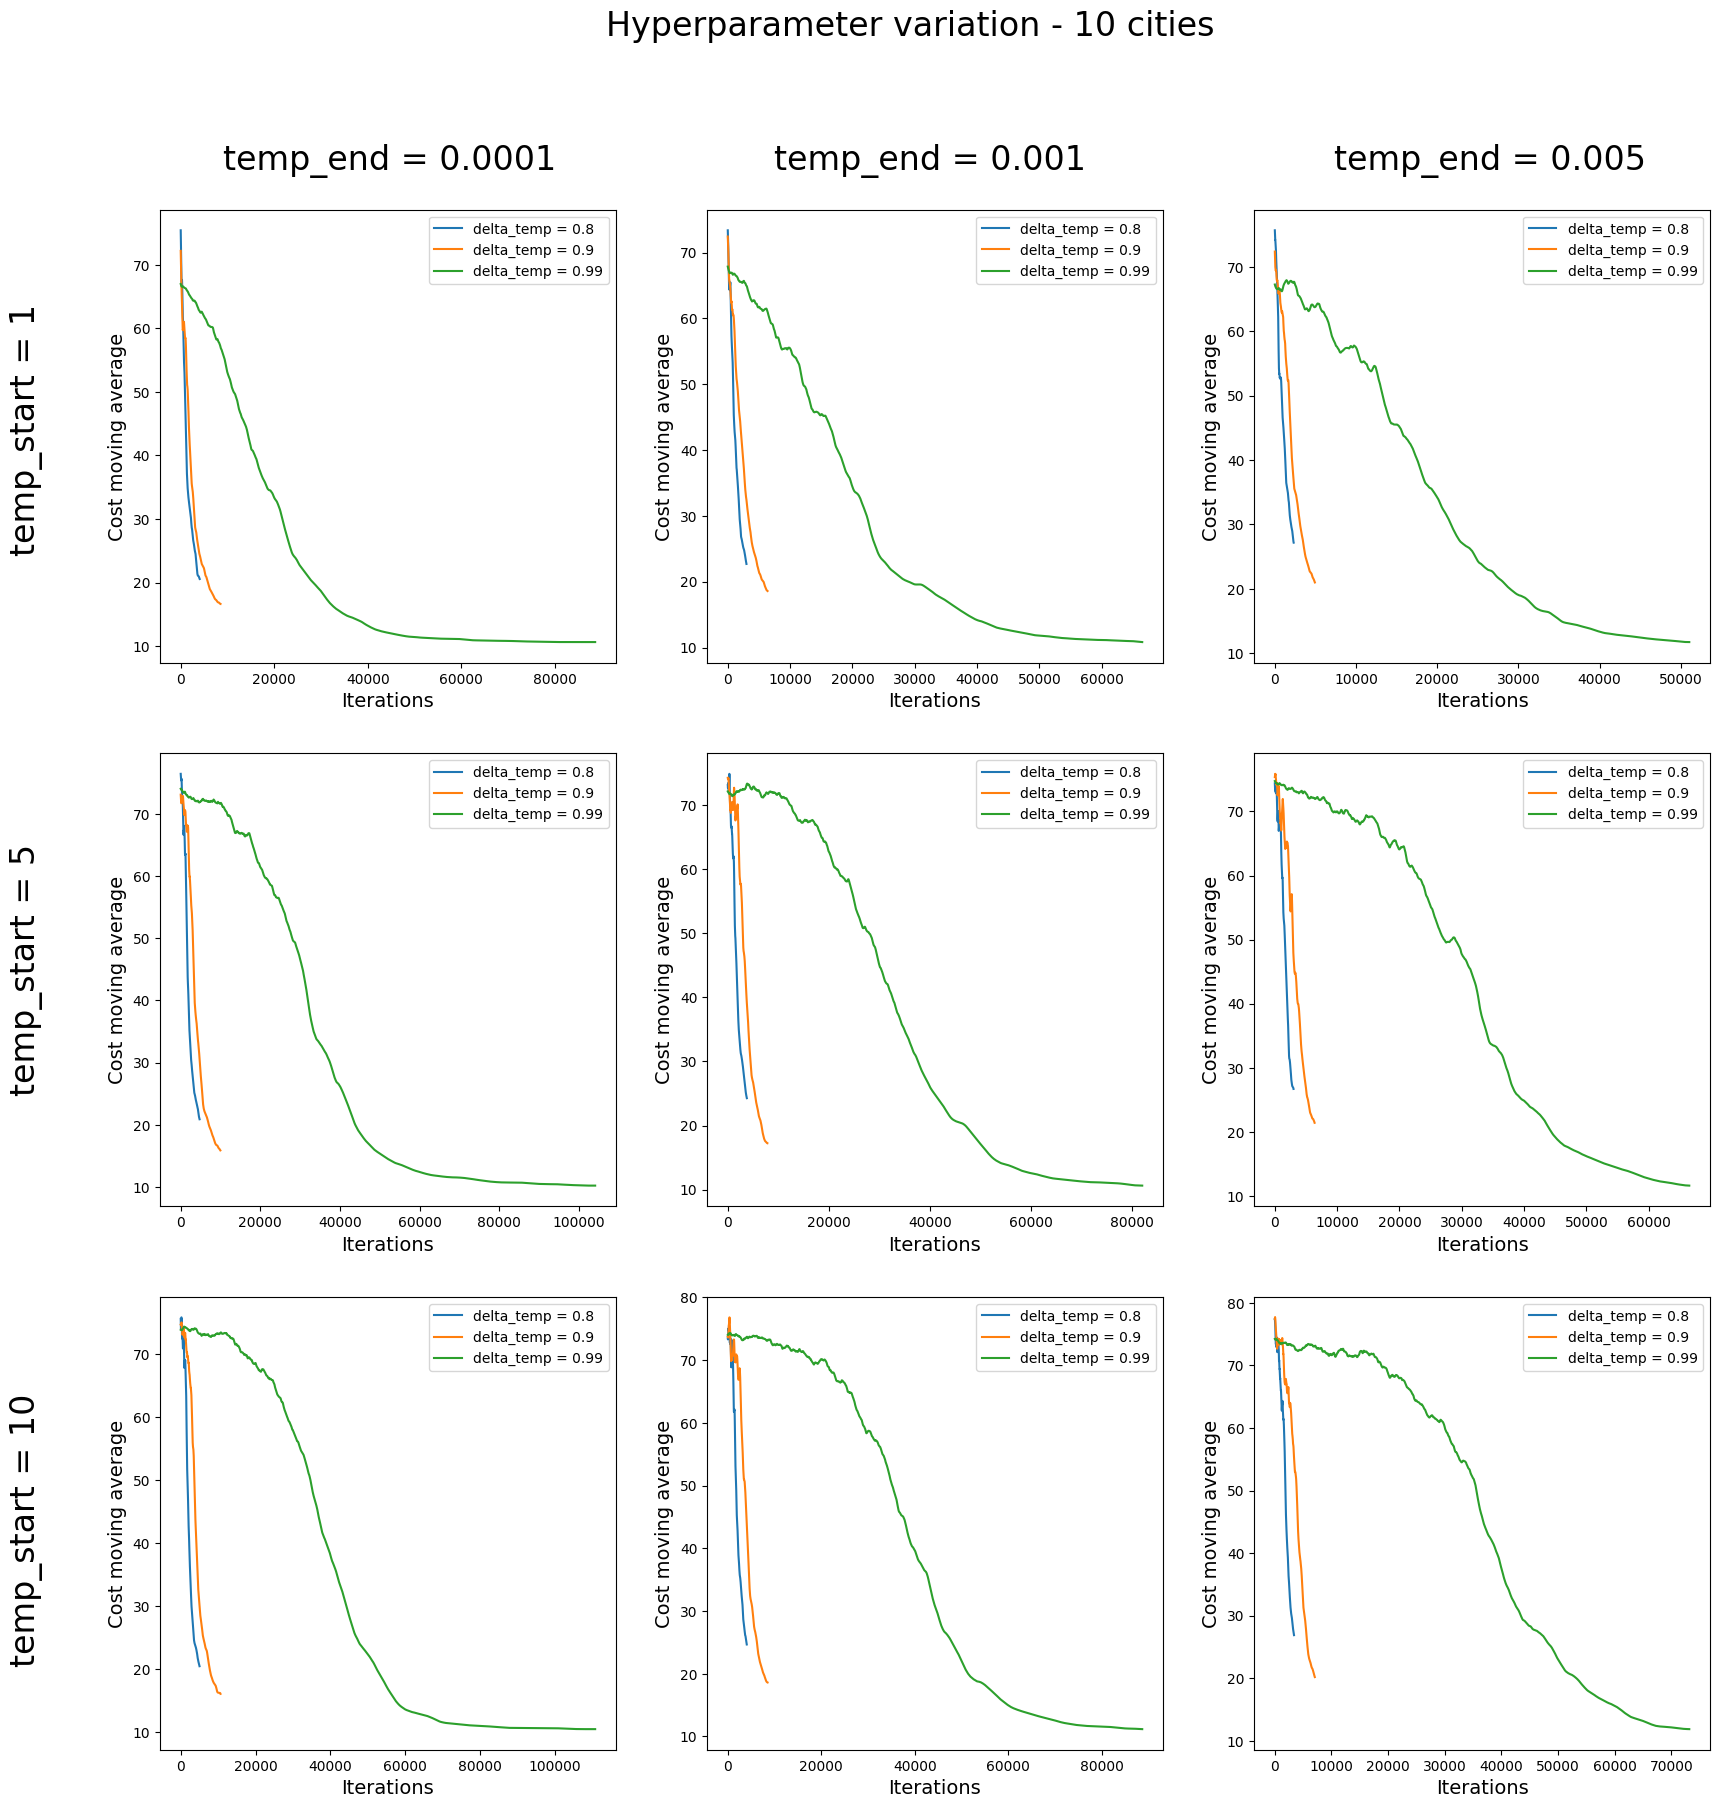

In [412]:
# 10 cities
fig.clear()
fig, ax = plt.subplots(3,3, figsize=(20,20))
fig.suptitle("Hyperparameter variation - 10 cities", fontsize=24)
fig.text(0.24, 0.9, 'temp_end = 0.0001', ha='center', fontsize=24)
fig.text(0.51, 0.9, 'temp_end = 0.001', ha='center', fontsize=24)
fig.text(0.79, 0.9, 'temp_end = 0.005', ha='center', fontsize=24)

fig.text(0.05, 0.22, 'temp_start = 10', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.5, 'temp_start = 5', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.77, 'temp_start = 1', va='center', rotation='vertical', fontsize=24)


for i in range(3):
  for j in range(3):
    #linha i e coluna j
    # i: temp_start
    # j: temp_end
    # d_temp = 0.8
    
    d_temp08  = [cost for cost in lists_of_costs[9*i + 3*j + 0]]
    d_temp09  = [cost for cost in lists_of_costs[9*i + 3*j + 1]]
    d_temp099 = [cost for cost in lists_of_costs[9*i + 3*j + 2]]
    
    window_size = int(len(d_temp08)/30)
    val = np.convolve(d_temp08, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.8')
    
    window_size = int(len(d_temp09)/30)
    val = np.convolve(d_temp09, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.9')
    
    window_size = int(len(d_temp099)/30)
    val = np.convolve(d_temp099, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.99')
    
    
    ax[i][j].set_xlabel("Iterations", fontsize=14)
    ax[i][j].set_ylabel("Cost moving average", fontsize=14)
    
    ax[i][j].legend()

### 50 cidades

In [ ]:
# 50 cities
paths = []
tempss = []
lists_of_costs = []
for i in temp_start:
  for j in temp_end:
    for k in d_temp:
      # print(f"cities:\t{10}\ndelta_temp:\t{k}\ntemp_start:\t{i}\ntemp_end:\t{j}")
      path, temps, list_of_costs = run(cities[:50], k, i, j)
      paths.append(path)
      tempss.append(temps)
      lists_of_costs.append(list_of_costs)

#### Variação em hiperparâmetros

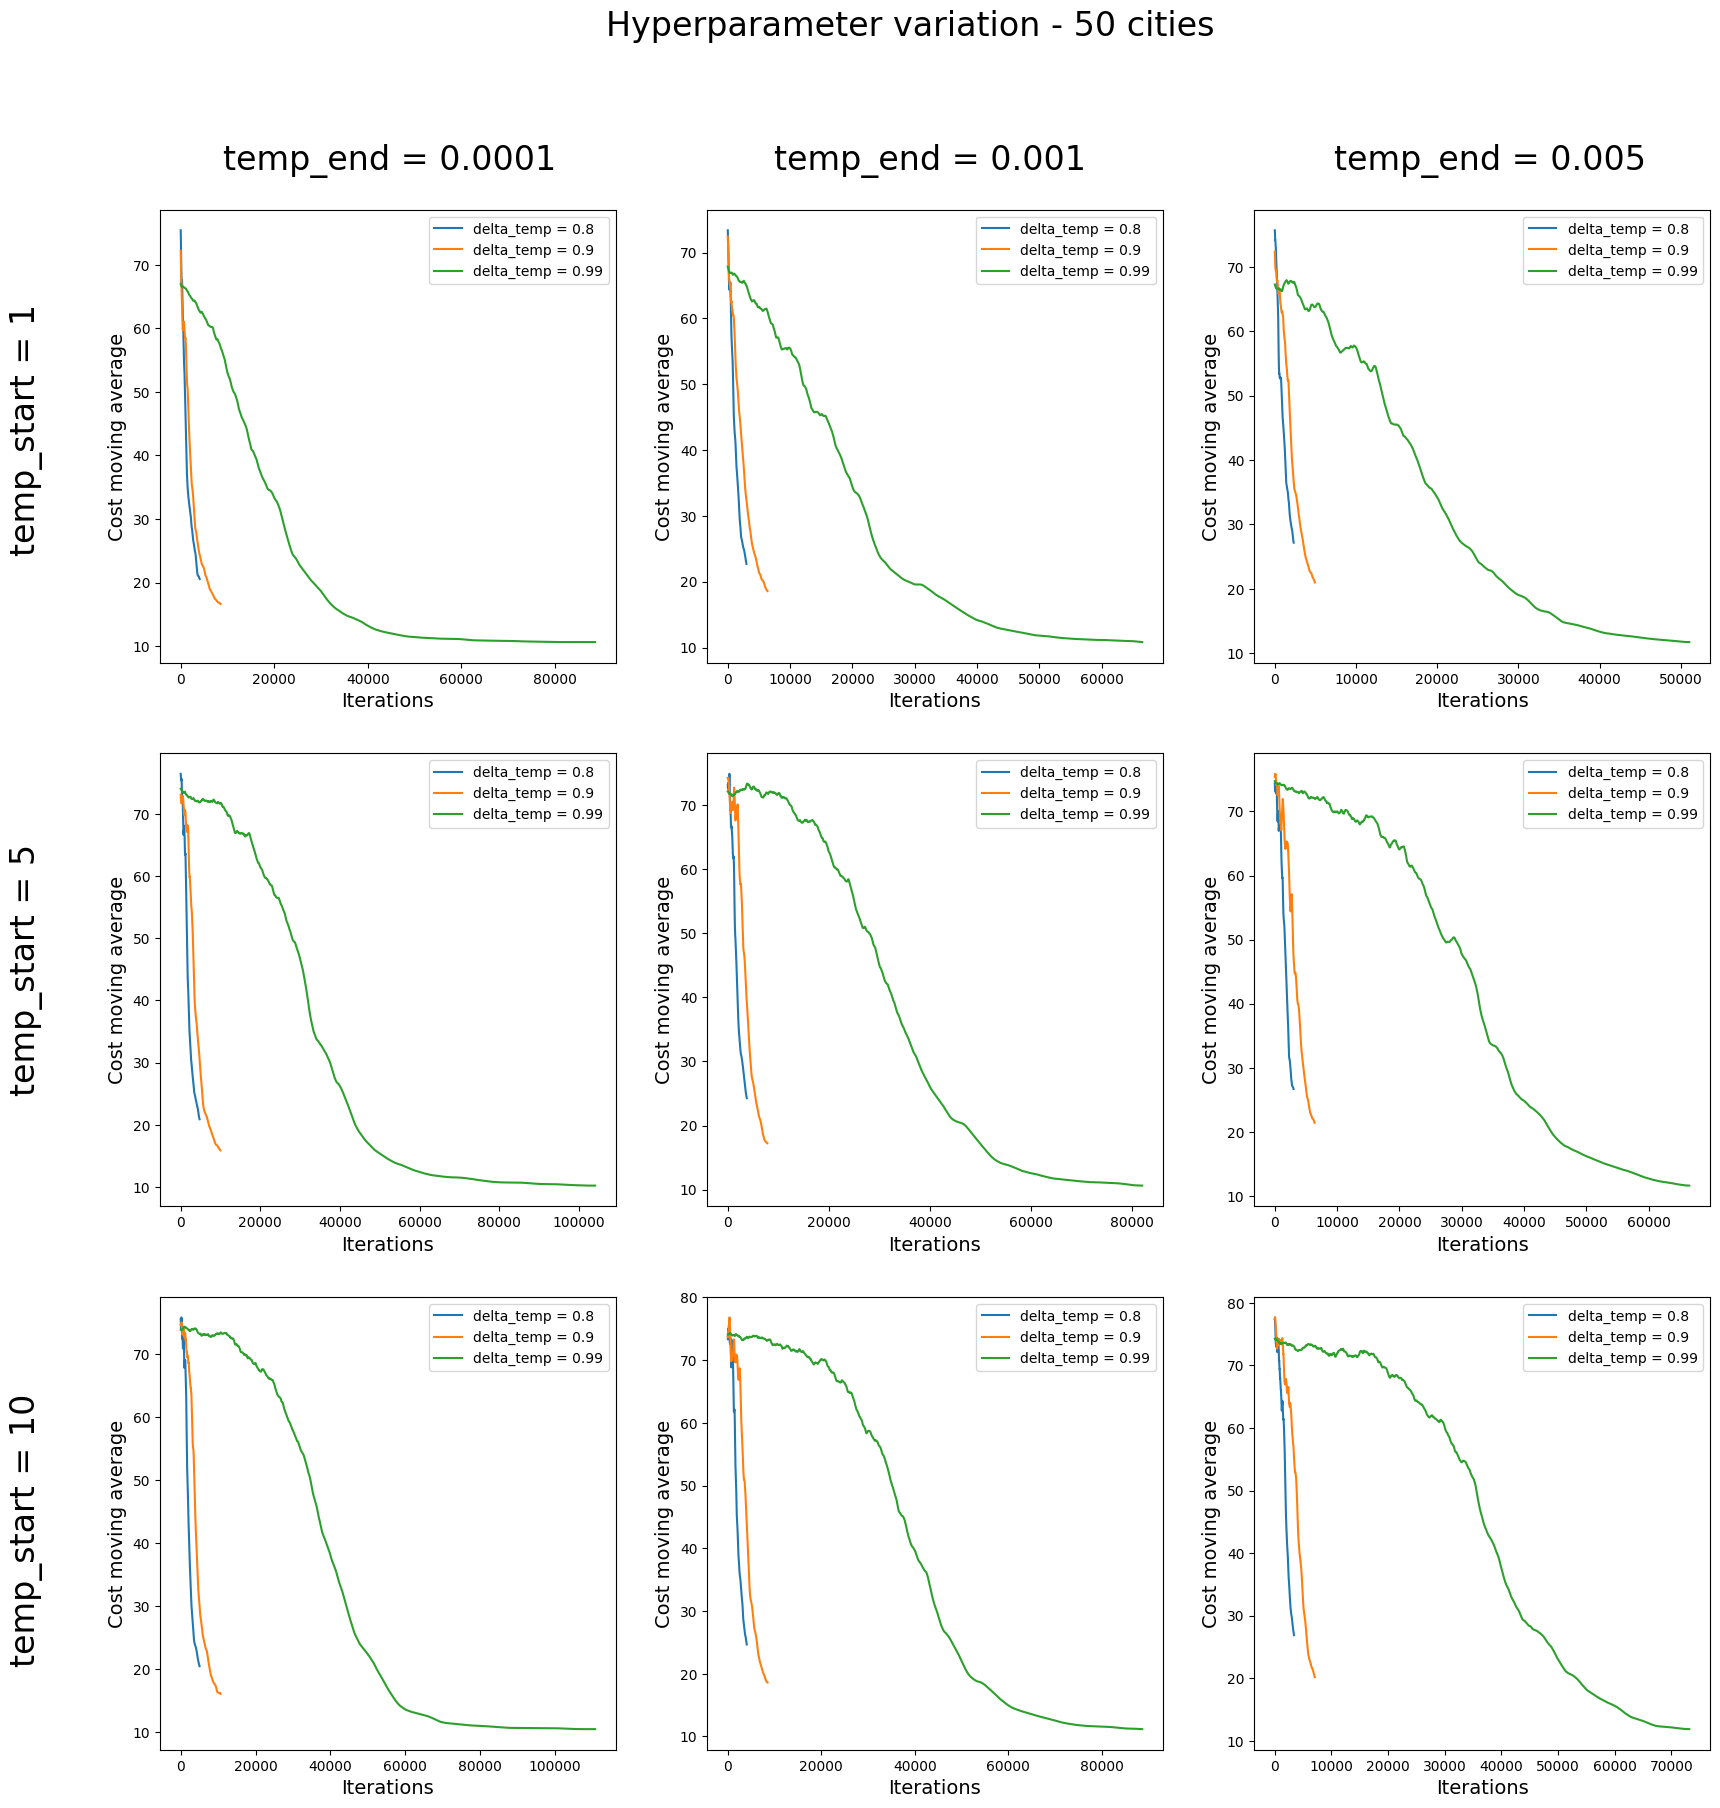

In [413]:
# 50 cities

fig.clear()
fig, ax = plt.subplots(3,3, figsize=(20,20))
fig.suptitle("Hyperparameter variation - 50 cities", fontsize=24)
fig.text(0.24, 0.9, 'temp_end = 0.0001', ha='center', fontsize=24)
fig.text(0.51, 0.9, 'temp_end = 0.001', ha='center', fontsize=24)
fig.text(0.79, 0.9, 'temp_end = 0.005', ha='center', fontsize=24)

fig.text(0.05, 0.22, 'temp_start = 10', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.5, 'temp_start = 5', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.77, 'temp_start = 1', va='center', rotation='vertical', fontsize=24)


for i in range(3):
  for j in range(3):
    #linha i e coluna j
    # i: temp_start
    # j: temp_end
    # d_temp = 0.8
    
    d_temp08  = [cost for cost in lists_of_costs[9*i + 3*j + 0]]
    d_temp09  = [cost for cost in lists_of_costs[9*i + 3*j + 1]]
    d_temp099 = [cost for cost in lists_of_costs[9*i + 3*j + 2]]
    
    window_size = int(len(d_temp08)/30)
    val = np.convolve(d_temp08, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.8')
    
    window_size = int(len(d_temp09)/30)
    val = np.convolve(d_temp09, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.9')
    
    window_size = int(len(d_temp099)/30)
    val = np.convolve(d_temp099, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.99')
    
    
    ax[i][j].set_xlabel("Iterations", fontsize=14)
    ax[i][j].set_ylabel("Cost moving average", fontsize=14)
    
    ax[i][j].legend()

### 100 cities

In [404]:
# 100 cities
paths = []
tempss = []
lists_of_costs = []
for i in temp_start:
  for j in temp_end:
    for k in d_temp:
      path, temps, list_of_costs = run(cities[:100], k, i, j)
      paths.append(path)
      tempss.append(temps)
      lists_of_costs.append(list_of_costs)

#### Variação em hiperparâmetros

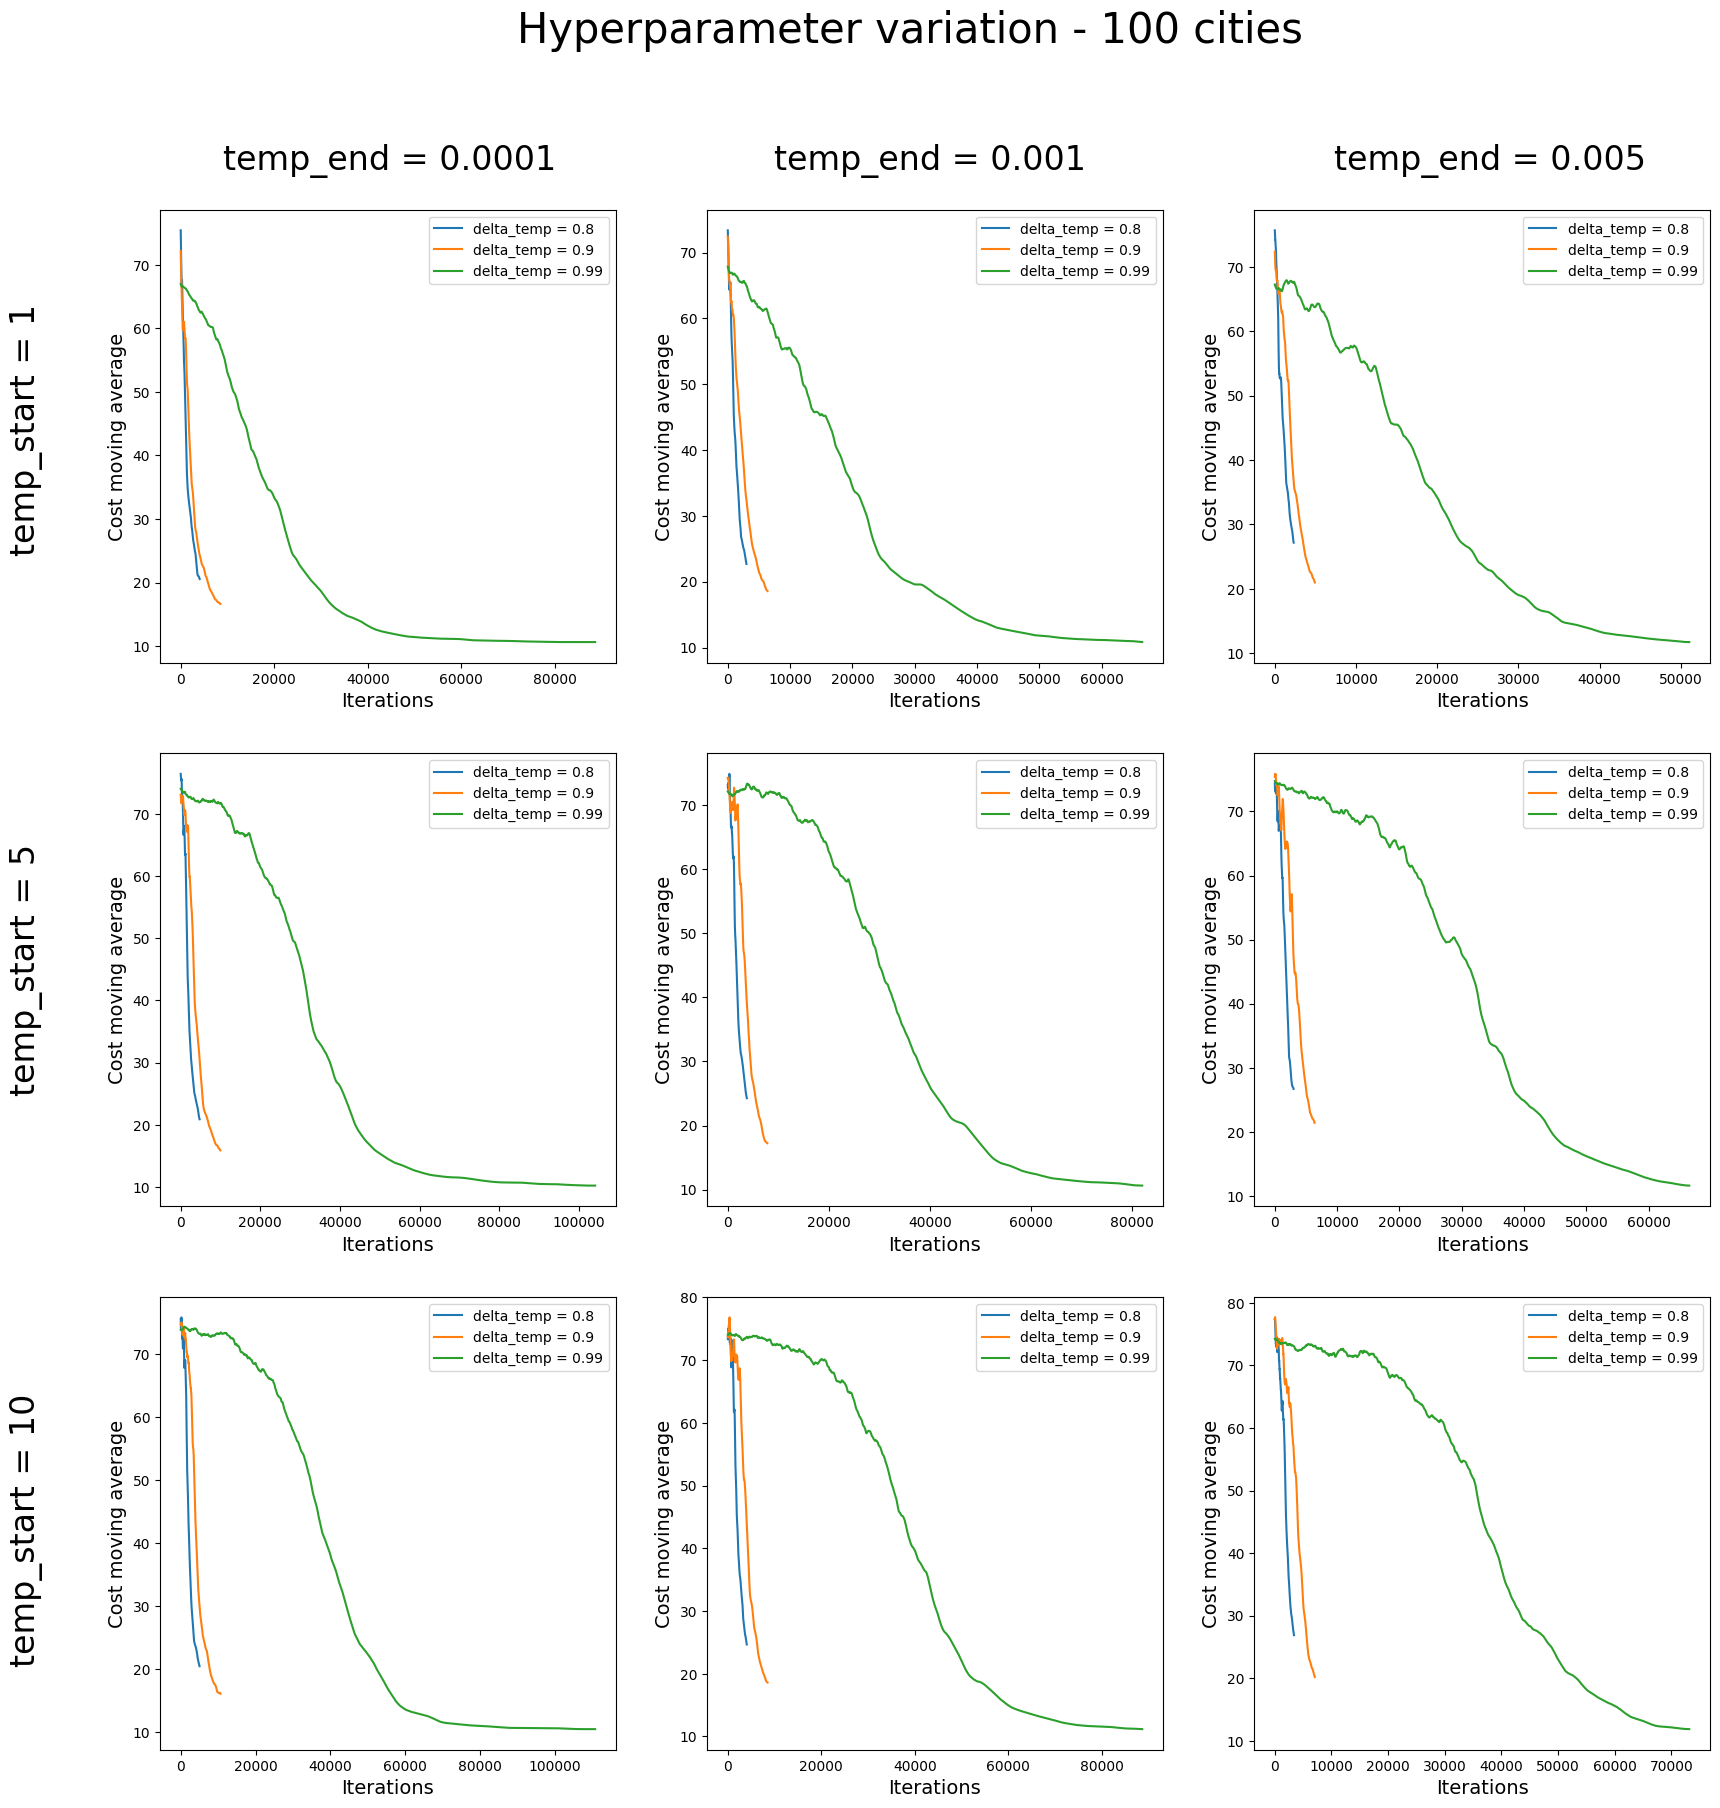

In [414]:
# 100 cities

fig.clear()
fig, ax = plt.subplots(3,3, figsize=(20,20))
fig.suptitle("Hyperparameter variation - 100 cities", fontsize=30)
fig.text(0.24, 0.9, 'temp_end = 0.0001', ha='center', fontsize=24)
fig.text(0.51, 0.9, 'temp_end = 0.001', ha='center', fontsize=24)
fig.text(0.79, 0.9, 'temp_end = 0.005', ha='center', fontsize=24)

fig.text(0.05, 0.22, 'temp_start = 10', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.5, 'temp_start = 5', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.77, 'temp_start = 1', va='center', rotation='vertical', fontsize=24)


for i in range(3):
  for j in range(3):    
    d_temp08  = [cost for cost in lists_of_costs[9*i + 3*j + 0]]
    d_temp09  = [cost for cost in lists_of_costs[9*i + 3*j + 1]]
    d_temp099 = [cost for cost in lists_of_costs[9*i + 3*j + 2]]
    
    window_size = int(len(d_temp08)/30)
    val = np.convolve(d_temp08, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.8')
    
    window_size = int(len(d_temp09)/30)
    val = np.convolve(d_temp09, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.9')
    
    window_size = int(len(d_temp099)/30)
    val = np.convolve(d_temp099, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.99')
    
    
    ax[i][j].set_xlabel("Iterations", fontsize=14)
    ax[i][j].set_ylabel("Cost moving average", fontsize=14)
    
    ax[i][j].legend()

### 150 cities

In [406]:
# 150 cities
paths = []
tempss = []
lists_of_costs = []
for i in temp_start:
  for j in temp_end:
    for k in d_temp:
      # print(f"cities:\t{10}\ndelta_temp:\t{k}\ntemp_start:\t{i}\ntemp_end:\t{j}")
      path, temps, list_of_costs = run(cities[:150], k, i, j)
      paths.append(path)
      tempss.append(temps)
      lists_of_costs.append(list_of_costs)

#### Variação em hiperparâmetros

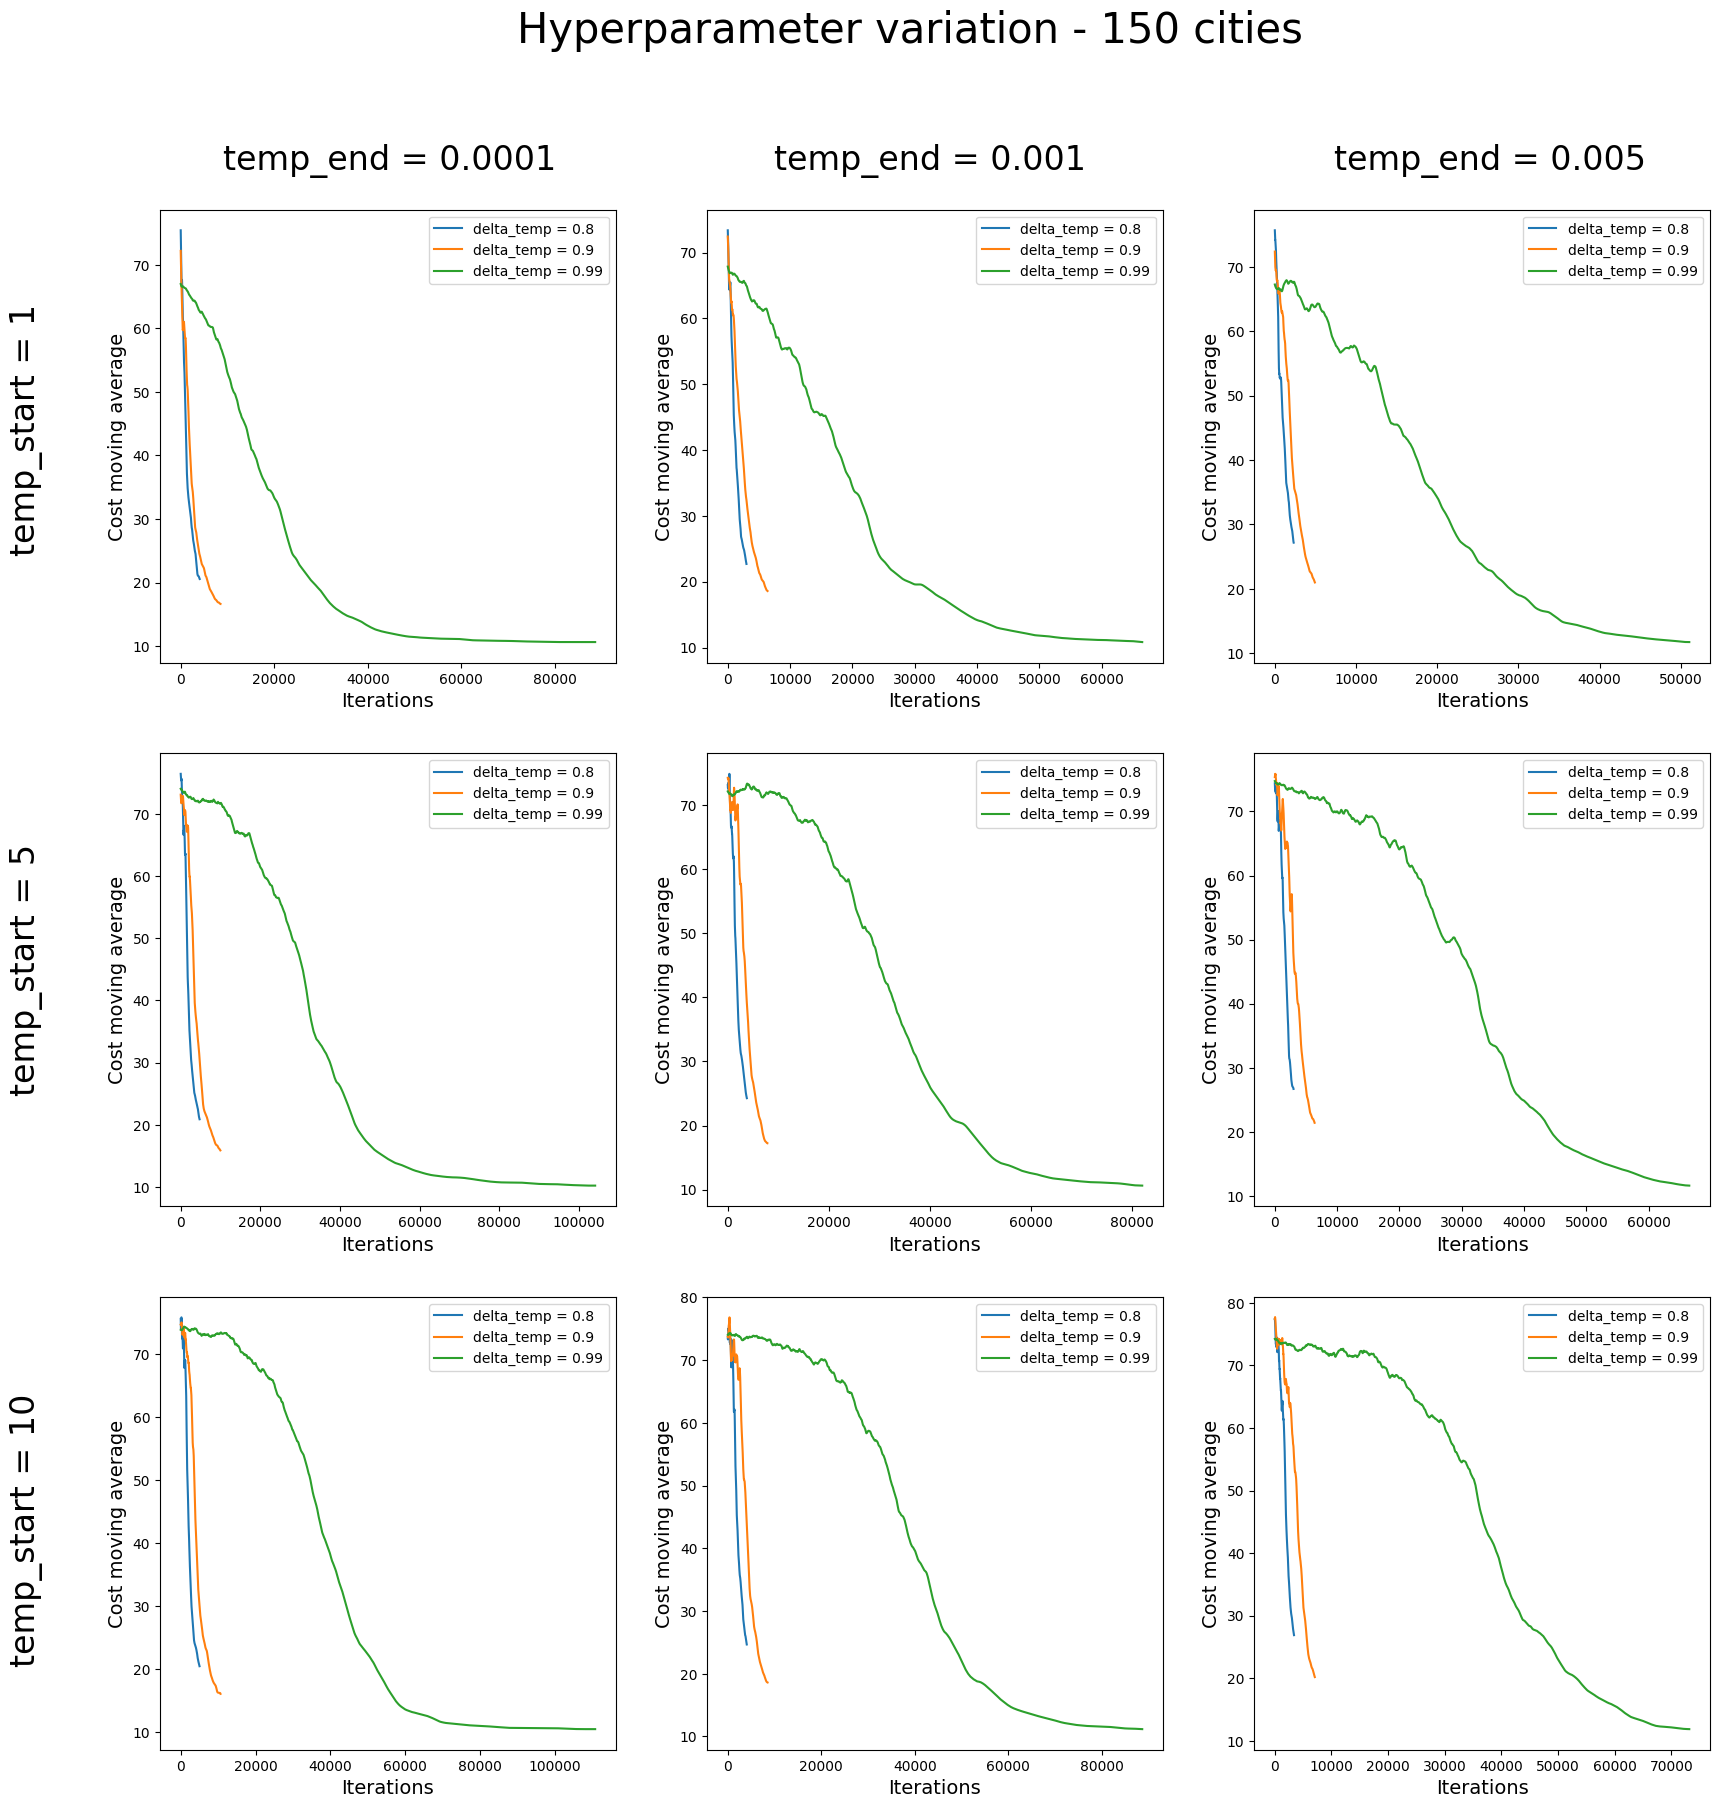

In [415]:
# 150 cities

fig.clear()
fig, ax = plt.subplots(3,3, figsize=(20,20))
fig.suptitle("Hyperparameter variation - 150 cities", fontsize=30)
fig.text(0.24, 0.9, 'temp_end = 0.0001', ha='center', fontsize=24)
fig.text(0.51, 0.9, 'temp_end = 0.001', ha='center', fontsize=24)
fig.text(0.79, 0.9, 'temp_end = 0.005', ha='center', fontsize=24)

fig.text(0.05, 0.22, 'temp_start = 10', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.5, 'temp_start = 5', va='center', rotation='vertical', fontsize=24)
fig.text(0.05, 0.77, 'temp_start = 1', va='center', rotation='vertical', fontsize=24)


for i in range(3):
  for j in range(3):
    #linha i e coluna j
    # i: temp_start
    # j: temp_end
    # d_temp = 0.8
    
    d_temp08  = [cost for cost in lists_of_costs[9*i + 3*j + 0]]
    d_temp09  = [cost for cost in lists_of_costs[9*i + 3*j + 1]]
    d_temp099 = [cost for cost in lists_of_costs[9*i + 3*j + 2]]
    
    window_size = int(len(d_temp08)/30)
    val = np.convolve(d_temp08, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.8')
    
    window_size = int(len(d_temp09)/30)
    val = np.convolve(d_temp09, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.9')
    
    window_size = int(len(d_temp099)/30)
    val = np.convolve(d_temp099, np.ones(window_size)/ window_size, mode='valid')
    ax[i][j].plot(val, label='delta_temp = 0.99')
    
    
    ax[i][j].set_xlabel("Iterations", fontsize=14)
    ax[i][j].set_ylabel("Cost moving average", fontsize=14)
    
    ax[i][j].legend()

### Caminhos
Considerando cenários com um maior número de cidades análisado, i.e. 150 cidades, vamos analisar a evolução dos caminhos encontrados ao decorrer do algoritmo. Isso vai permitir uma visualização do processo de melhora do caminho encontrado. Além disso, será tomada a liberdade de escolher hiperparâmetros fixos, uma vez que o objetivo dessa análise é apenas visualizar a melhora nos caminhos encontrados. Os hiperparâmetros serão:
- **Temperatura inicial = 1**
- **Temperatura final = 0.0001**
- **Variação da temperatura a cada 100 passos = 0.99**



- graficos dos caminhos amostrados
- evolução de ocorre desde altas temperaturas até baixas


In [504]:
path, temps, list_of_costs, list_of_paths = run(cities[:150], 0.99, 1, 0.0001)

In [505]:
paths = [list_of_paths[i] for i in range(0, len(list_of_paths), 100)]

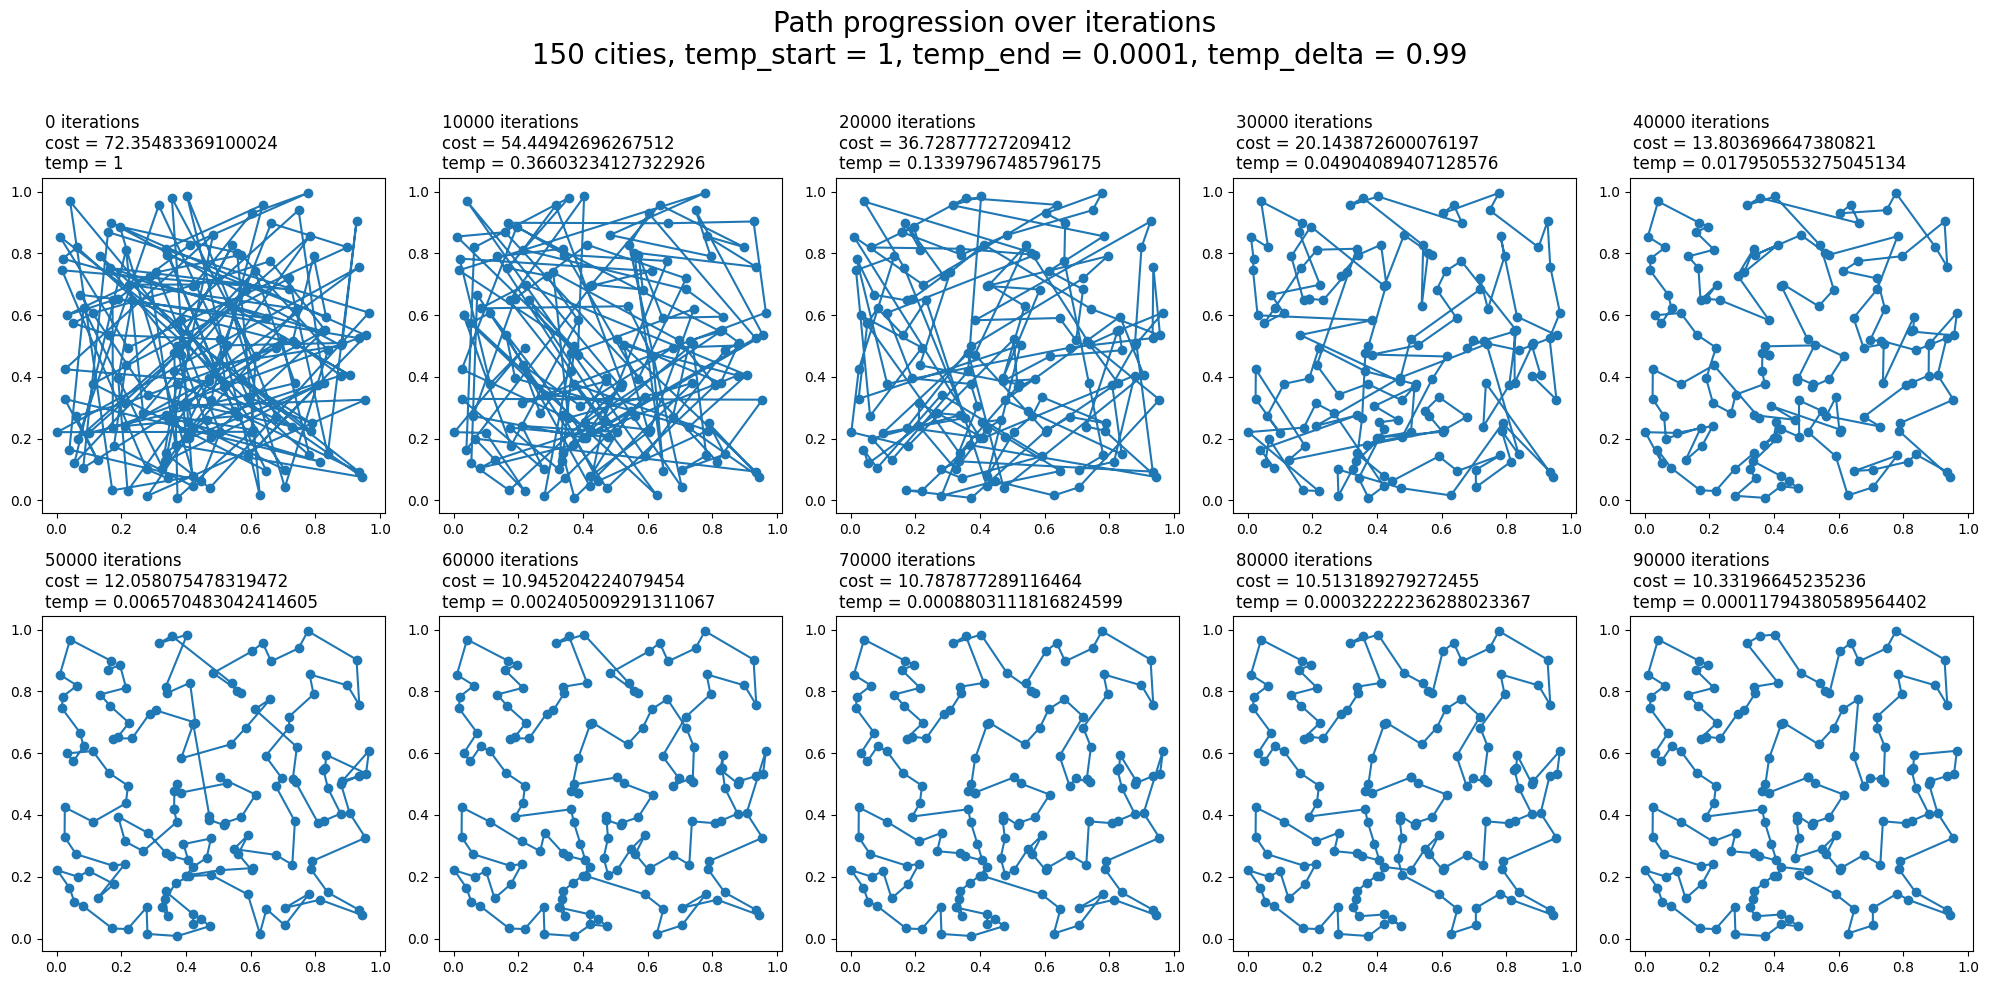

In [515]:
fig, ax = plt.subplots(2,5, figsize=(20,10))
fig.suptitle("Path progression over iterations\n 150 cities, temp_start = 1, temp_end = 0.0001, temp_delta = 0.99\n", fontsize=20)
for i in range(2):
  for j in range(5):
    ax[i,j].plot([cities[paths[5*i+j][0][it]].x for it in range(len(paths[5*i+j][0]))] + [cities[paths[5*i+j][0][0]].x], [cities[paths[5*i+j][0][it]].y for it in range(len(paths[5*i+j][0]))] + [cities[paths[5*i+j][0][0]].y], marker='o')
    ax[i,j].set_title(f"{paths[5*i+j][1] - 100} iterations\ncost = {paths[5*i+j][2]}\ntemp = {paths[5*i+j][3]}", ha='left',x = 0.01)
    
fig.tight_layout()

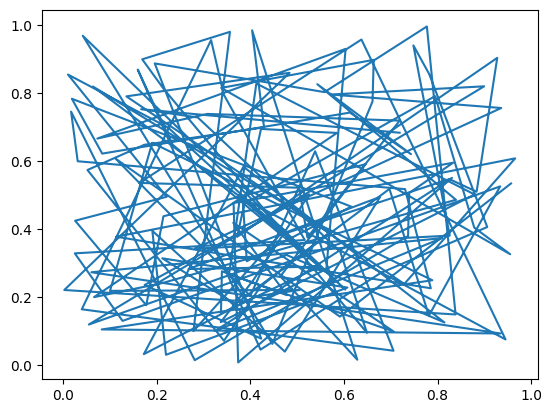

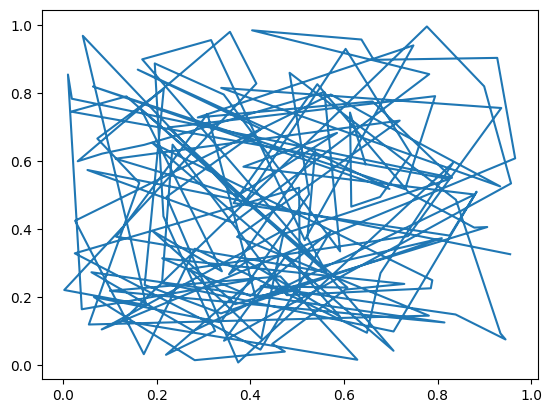

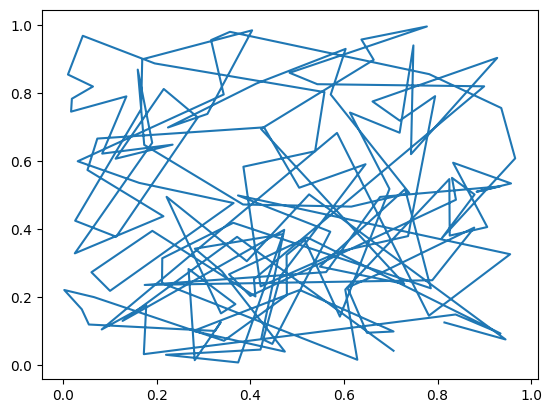

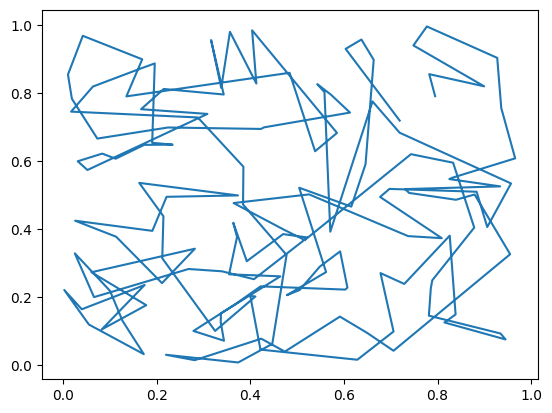

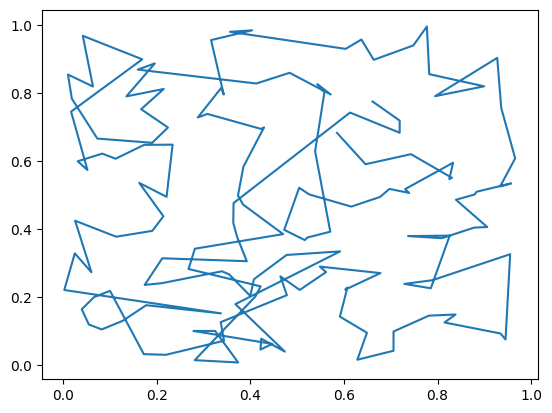

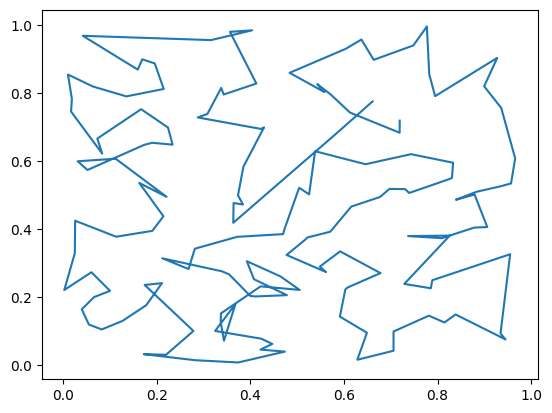

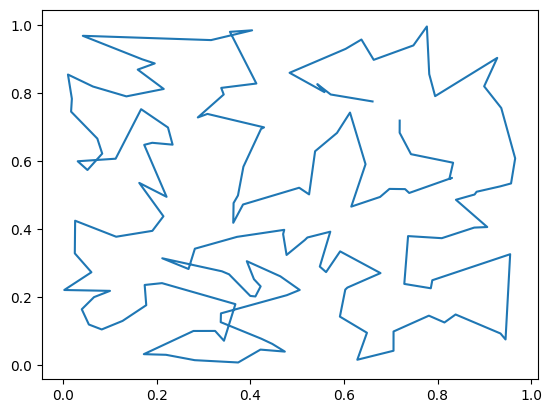

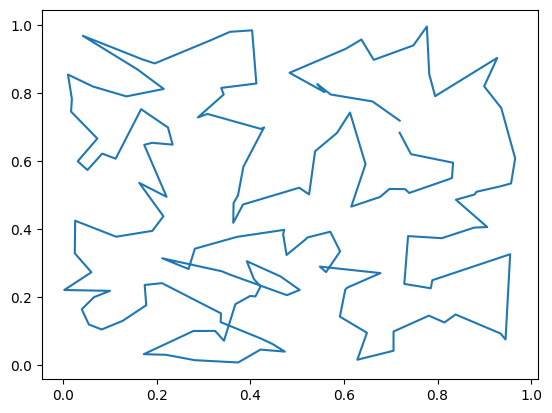

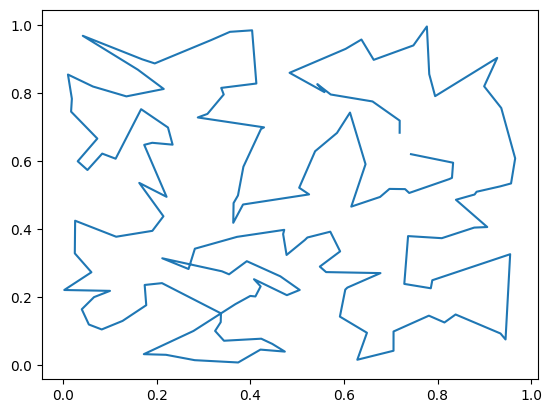

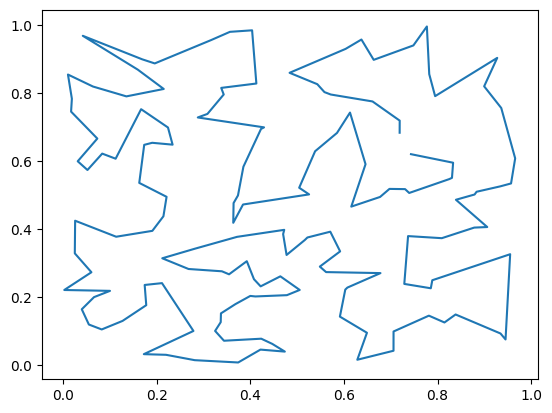

In [463]:
paths = [list_of_paths[i] for i in range(0, len(list_of_paths), 100)]
# # 
# [cities[paths[0][i]].x for i in range(len(paths[0]))]

for it in range(len(paths)):
  plt.plot([cities[paths[it][0][i]].x for i in range(len(paths[0][0]))], [cities[paths[it][0][i]].y for i in range(len(paths[0][0]))])
  plt.show()


# for i in range(2):
#   for j in range(5):
    
  


# end

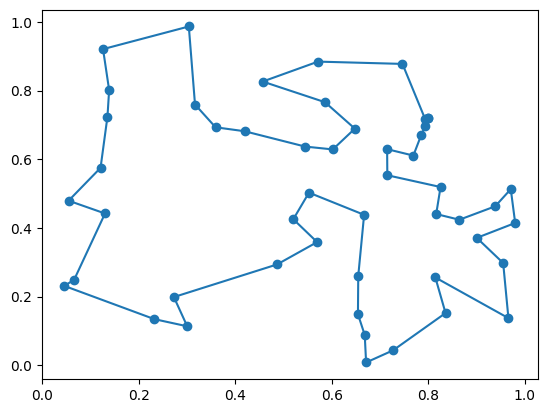

In [184]:
plt.plot([cities[path[i]].x for i in range(len(path))] + [cities[path[0]].x], [cities[path[i]].y for i in range(len(path))] + [cities[path[0]].y], marker='o')